# Classification of Traffic Signs

April Meyer

DSC680-T301 Applied Data Science (2215-1)

##### Problem Statement
For my third term project I want to classify Traffic Signs with CNN. Convolutional neural networks (CNN) which are sometimes known as convnets (1). It is a deep learning model that is predominantly used for computer vision (1).  A convent algorithm will take in an input image, give importance to facets in the image, and separate one from another (3).  

##### Research Questions
Below are some initial questions that I could explore:
1.	How many classes are there?
2.	How many images?
3.	What modifications should be done to the image? Rotation, color distortion or blurring? 
4.	Is there a pretrained convnet available for traffic signs? 
 

##### Dataset
The link to the data is https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed. This is ready to use preprocessed data for Traffic Signs saved into the nine pickle files.

Original datasets are in the following files:
•	train.pickle
•	valid.pickle
•	test.pickle

In [2]:
#all libraries that are need for exercises

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [4]:
import os
for dirname, _, filenames in os.walk('C:/Users/swim_/DSC 680 Applied Data Science/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('C:/Users/swim_/DSC 680 Applied Data Science/input'))

C:/Users/swim_/DSC 680 Applied Data Science/input\data0.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data1.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data2.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data3.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data4.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data5.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data6.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data7.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\data8.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\datasets_preparing.py
C:/Users/swim_/DSC 680 Applied Data Science/input\labels.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\label_names.csv
C:/Users/swim_/DSC 680 Applied Data Science/input\mean_image_gray.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\mean_image_rgb.pickle
C:/Users/swim_/DSC 680 Applied Data Science/input\std_gray.pickle
C:/Users/swim_/DSC 6

In [5]:
# Loading dataset data2.pickle with RGB examples
with open('C:/Users/swim_/DSC 680 Applied Data Science/input/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# Preparing y_train and y_validation for using in Keras
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


(81, 32, 32, 3)


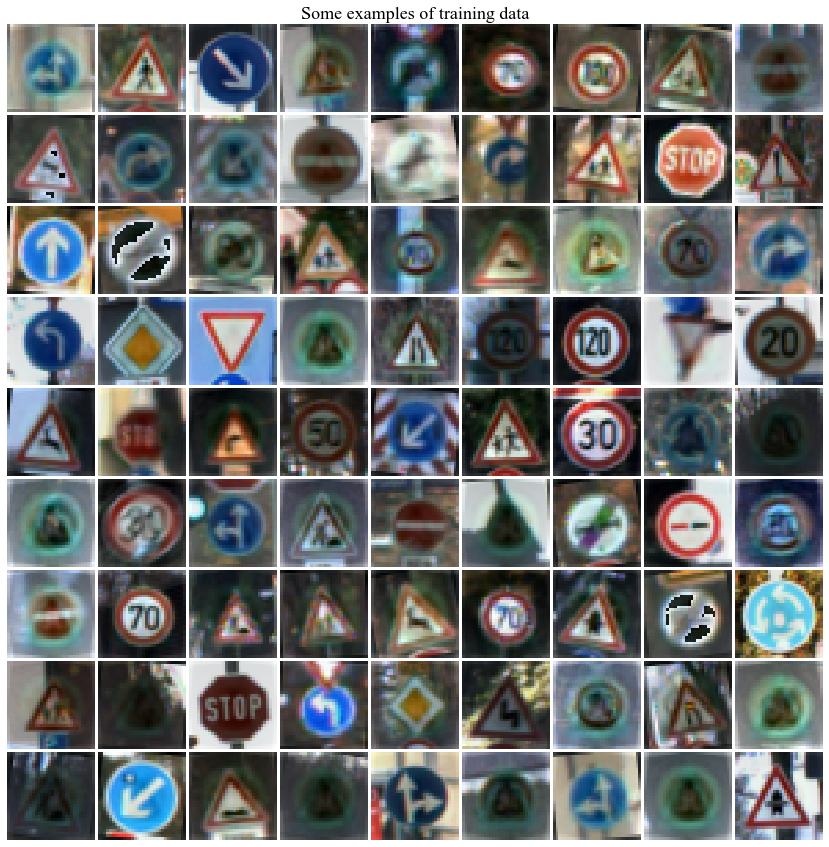

In [6]:
%matplotlib inline

def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid


# Visualizing some examples of training data
examples = data['x_train'][:81, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()

In [7]:
# CNN with Keras with filters of size 3x3
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# overfitting small data
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h = model.fit(data['x_train'][:10], data['y_train'][:10],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Train on 10 samples, validate on 4410 samples
Epoch 1/15
10/10 [==============================] - 4s 358ms/step - loss: 3.7752 - accuracy: 0.1000 - val_loss: 3.8724 - val_accuracy: 0.0388
Epoch 2/15
10/10 [==============================] - 3s 305ms/step - loss: 3.0006 - accuracy: 0.4000 - val_loss: 4.3617 - val_accuracy: 0.0406
Epoch 3/15
10/10 [==============================] - 3s 311ms/step - loss: 2.4860 - accuracy: 0.7000 - val_loss: 5.0000 - val_accuracy: 0.0438
Epoch 4/15
10/10 [==============================] - 3s 307ms/step - loss: 2.0809 - accuracy: 0.6000 - val_loss: 5.6282 - val_accuracy: 0.0429
Epoch 5/15
10/10 [==============================] - 3s 307ms/step - loss: 1.7361 - accuracy: 0.6000 - val_loss: 6.2130 - val_accuracy: 0.0451
Epoch 6/15
10/10 [==============================] - 3s 316ms/step - loss: 1.4792 - accuracy: 0.6000 - val_loss: 6.7660 - val_accuracy: 0.0433
Epoch 7/15
10/10 [==============================] - 3s 340ms/step - loss: 1.2595 - accuracy: 0.6000 - 

In [9]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.04830


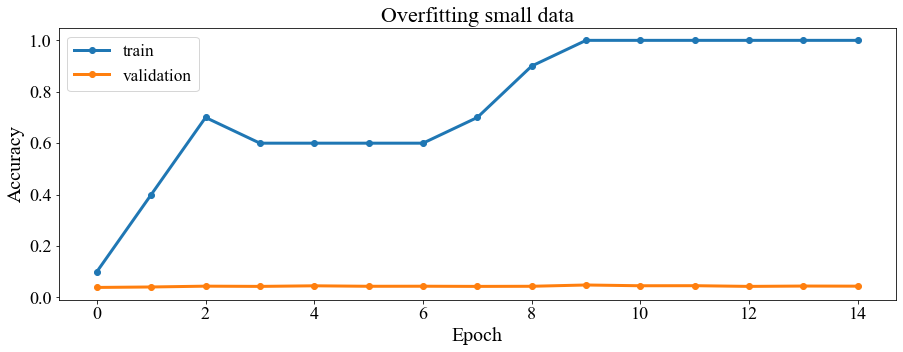

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Overfitting small data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('overfitting_small_data.png')
plt.close()

In [13]:
# Building model of CNN with Keras
# Trying one model with filters of size 3x3
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = model.fit(data['x_train'][:12000], data['y_train'][:12000],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Train on 12000 samples, validate on 4410 samples
Epoch 1/5
12000/12000 [==============================] - 213s 18ms/step - loss: 1.4541 - accuracy: 0.6077 - val_loss: 1.0391 - val_accuracy: 0.7050
Epoch 2/5
12000/12000 [==============================] - 215s 18ms/step - loss: 0.4197 - accuracy: 0.8828 - val_loss: 0.8123 - val_accuracy: 0.7737
Epoch 3/5
12000/12000 [==============================] - 221s 18ms/step - loss: 0.2257 - accuracy: 0.9358 - val_loss: 0.8726 - val_accuracy: 0.8036
Epoch 4/5
12000/12000 [==============================] - 221s 18ms/step - loss: 0.1529 - accuracy: 0.9550 - val_loss: 0.9721 - val_accuracy: 0.8014
Epoch 5/5
12000/12000 [==============================] - 226s 19ms/step - loss: 0.1146 - accuracy: 0.9676 - val_loss: 1.1137 - val_accuracy: 0.8161
Epochs=5, training accuracy=0.96758, validation accuracy=0.81610


In [14]:
# Trying different models with different dimensions of filters
filters = [3, 5, 9, 13]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Training set of models of CNN with Keras with different dimensions of filters
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'][:12000], data['y_train'][:12000],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model with filters 3x3, epochs=5, training accuracy=0.99267, validation accuracy=0.89660
Model with filters 5x5, epochs=5, training accuracy=0.96617, validation accuracy=0.82902
Model with filters 9x9, epochs=5, training accuracy=0.95425, validation accuracy=0.80091
Model with filters 13x13, epochs=5, training accuracy=0.93833, validation accuracy=0.77800


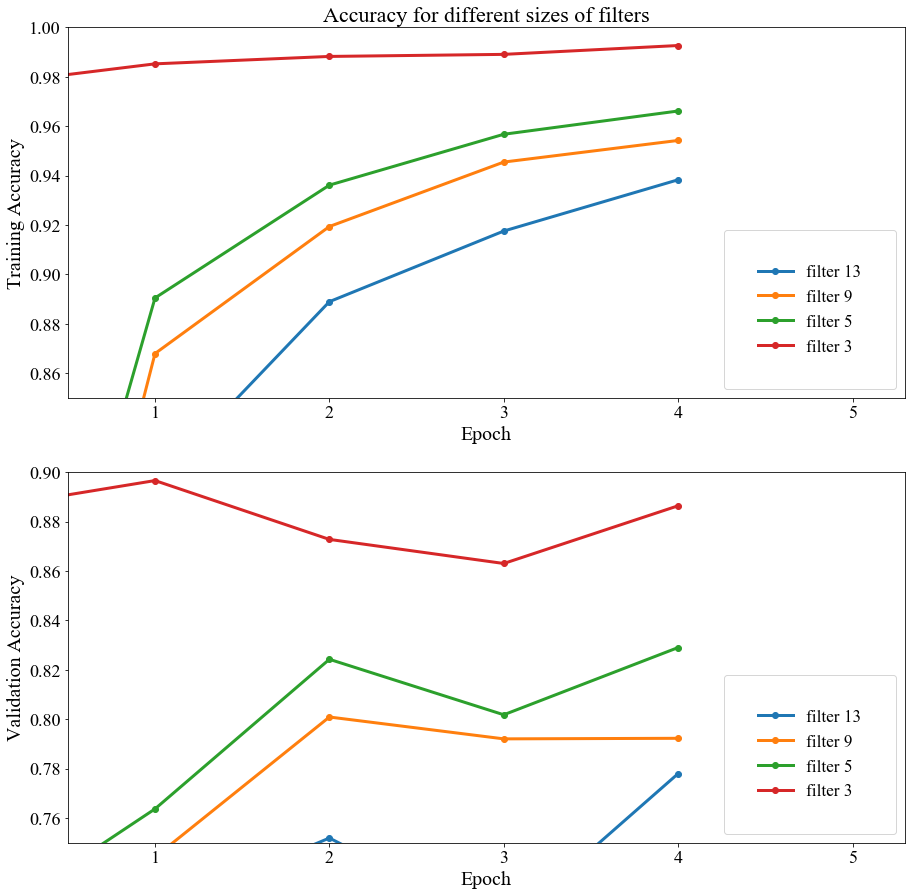

data2 filter 3 training accuracy = 0.99267
data2 filter 5 training accuracy = 0.96617
data2 filter 9 training accuracy = 0.95425
data2 filter 13 training accuracy = 0.93833

data2 filter 3 validation accuracy = 0.89660
data2 filter 5 validation accuracy = 0.82902
data2 filter 9 validation accuracy = 0.80091
data2 filter 13 validation accuracy = 0.77800


In [22]:
# Plotting comparison results for accuracy
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

# Plotting history of training accuracy
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
# plt.gca().set_title('Validation accuracy')
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('models_accuracy.png')
plt.close()


# Showing values of accuracy for different filters
for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [23]:
# Calculating accuracy with testing dataset
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)
    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

data2 filter 3 testing accuracy = 0.89097
data2 filter 5 testing accuracy = 0.83365
data2 filter 9 testing accuracy = 0.83001
data2 filter 13 testing accuracy = 0.79319


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 32, 32, 3)
[3]


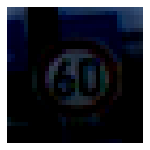

(43,)
ClassId: 3
Label: Speed limit (60km/h)


In [28]:
# Predicting with one image from test dataset
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model[0].predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text('C:/Users/swim_/DSC 680 Applied Data Science/input/label_names.csv')

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])